# Tarea 3

**Envío del PR inicial:** viernes 21 de septiembre

**Aceptación del PR:** martes 25 de septiembre

## 1

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. 

- ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?
    
- ¿Qué propiedad hace que el interés en este mapeo sea el intervalo [-2,2]$


In [180]:
using Plots
using PyPlot
using LaTeXStrings
using Calculus
gr()

Plots.GRBackend()

In [159]:
doc"""
    Fμ(f, x0, n_iter)
Devuelve el vector `iterados` que incluye como componentes a la condicion inicial `x_0` y a los iterados obtenidos a partir de `x_0` evaluado en la función `F` 
"""
function Fμ(f, x0, n_iter::Int64=1000)

    iterados= [x0]    
    x_nn = x_n = x0
    
    for i in 1:n_iter
        x_nn = f(x_n)
        x_n = x_nn
        push!(iterados, x_nn)
    end
    
    return iterados
end

Fμ

In [160]:
F(x) = x^2 - 2

F (generic function with 1 method)

### (a) Condición inicial $x_0 = 0 $

In [161]:
Fμ(F, 0, 10000)

10001-element Array{Int64,1}:
  0
 -2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  ⋮
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2

 Para la condición $x_0 = 0$ observamos que a partir de $F^2$, $F(x) = 2$, es decir, que desde $F^2(x)$ hasta $F^{100}(x)$, $F(x) = 2$. Dicho de otra manera, el unico itereado diferente de 2 es el primer iterado $F^1(x)$

### (b) Condición inicial $x_0 = 0.1$

In [162]:
Fμ(F, 0.1, 10000)

10001-element Array{Float64,1}:
  0.1      
 -1.99     
  1.9601   
  1.84199  
  1.39293  
 -0.0597333
 -1.99643  
  1.98574  
  1.94317  
  1.77589  
  1.15379  
 -0.668772 
 -1.55274  
  ⋮        
 -0.18187  
 -1.96692  
  1.86879  
  1.49237  
  0.227155 
 -1.9484   
  1.79626  
  1.22657  
 -0.495532 
 -1.75445  
  1.07809  
 -0.837723 

### (c) Condición inicial $x_0 = 0.001$

In [163]:
Fμ(F, 0.001, 10000)

10001-element Array{Float64,1}:
  0.001   
 -2.0     
  2.0     
  1.99998 
  1.99994 
  1.99974 
  1.99898 
  1.99591 
  1.98364 
  1.93482 
  1.74353 
  1.03991 
 -0.918594
  ⋮       
 -0.354982
 -1.87399 
  1.51183 
  0.28563 
 -1.91842 
  1.68032 
  0.823468
 -1.3219  
 -0.25258 
 -1.9362  
  1.74888 
  1.05859 

## 2

Escriban una función cuyos argumentos son la función `F` del mapeo, `x0`, la condición inicial, y `n` el número de iterados del mapeo (un número entero), que genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

¿Qué pueden concluir de iterar *muchas* veces una condición inicial?

In [164]:
doc"""
    mapeoitertivo(f, x0, n_iter)
Devuelve la n-ésima iteración de la función `f` a partir de la condición inicial $x_0$.

"""

function itera_mapeo(F, x0, n_iter=100)
    xnn = [x0]
    x = [x0]; y = [-10000.]
    for i in 1:n_iter
        xn = xnn[end]
        Fn = F(xn)
        push!(xnn, Fn)
        push!(x, xn)
        push!(y, Fn)
        push!(x, Fn)
        push!(y, Fn)
    end
    x_range = [minimum(x), maximum(x)+2]
    y_range = [minimum(y[2:end])-2, maximum(y)+2]
    xx = linspace(x_range[1], x_range[2], 1000)
    p = Plots.plot(xlim=x_range, ylim=y_range)
    Plots.plot!(xx, x -> F(x), label="F(x)")
    Plots.plot!(xx, x -> x, label="y=x")
    Plots.plot!(x, y, ls=:dash, marker=(3, .5, :dot), label="Trayectoria")
    xnn, p
end

itera_mapeo

## 3

- Usen el análisis gráfico para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Den explícitamente los puntos fijos.
    
- Usen el método de Newton, usando iterados iniciales  sagazmente seleccionados, para obtener los puntos fijos.

## 4

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

- $F_1(x) = \frac{1}{3x}$.

- $F_2(x) = -\frac{x^5}{5}$.

- $F_3(x) = \frac{x}{2}-2$.

### (a) $F_1(x) = \frac{1}{3x}$.

In [243]:
F1(x) = 1/3x

F1 (generic function with 1 method)

In [244]:
xnn_F11, p_11 = itera_mapeo(F1, 0.1, 100)

([0.1, 3.33333, 0.1, 3.33333, 0.1, 3.33333, 0.1, 3.33333, 0.1, 3.33333  …  3.33333, 0.1, 3.33333, 0.1, 3.33333, 0.1, 3.33333, 0.1, 3.33333, 0.1], Plot{Plots.GRBackend() n=3})

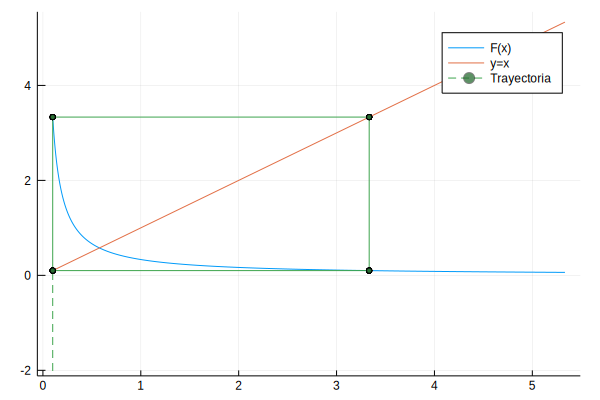

In [245]:
p_11

### (b) $F_2(x) = -\frac{x^5}{5}$.

### (c) $F_3(x) = \frac{x}{2}-2$.

## 5

- Para el mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$ (ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de $20\,000$ iterados. Obtengan el histograma de frecuencia (normalizado) de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

- Repitan el inciso anterior para el mapeo: $G(x) = 2x \mod 1$ en el intervalo [0,1].

(NOTA: En cuanto al histograma, pueden construir su propia función que haga el histograma, o buscar en las entrañas de la documentación.)

Proponemos la función `random` para encontrar un punto al azar en cualquier intervalo $[a,b]$. En este caso, se encontrarán puntos al azar en el intervalo $[-2,2]$ para el mapeo $F(x) = x^2-2$.

In [168]:
"""
    random(distancia, semidistancia)
Devuelve un número aleatorio entre el intervalo [a,b]. La primera componenete de la funcnion es la `distancia` entre `a` y `b`, mientras que la segunda componenete hace referencia a la `semidistancia` entre `a y `b`.
"""

function random(distancia, semidistancia)
    aleatorio = (distancia * rand()) - semidistancia)
    return aleatorio
end 

random

### (a) Mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$

Puesto que la función $F(x) = x^2-2$ fue definida en el ejercicio 1, se obtendrá un punto aleatorio en el intervalo $[-2,2]$ haciendo uso de la función `random`, para posteriormente generar una órbita de $20\,000$ iterados utilizando para ello la función `F\mu`.

In [169]:
x_aleatorio_1 = random(4, 2)

iterados_aleatorios_1 = Fμ(F, x_aleatorio_1, 20000)

20001-element Array{Float64,1}:
 -0.196048   
 -1.96157    
  1.84774    
  1.41414    
 -0.000221663
 -2.0        
  2.0        
  2.0        
  2.0        
  1.99999    
  1.99995    
  1.9998     
  1.9992     
  ⋮          
 -1.95581    
  1.8252     
  1.33137    
 -0.227457   
 -1.94826    
  1.79573    
  1.22465    
 -0.500238   
 -1.74976    
  1.06167    
 -0.872862   
 -1.23811    

In [171]:
#h_1= histogram(iterados_aleatorios, nbins=length(iterados_aleatorios));
#savefig(h, "histograma.png")

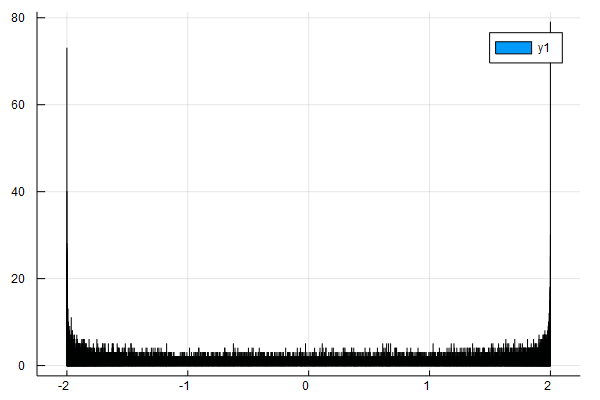

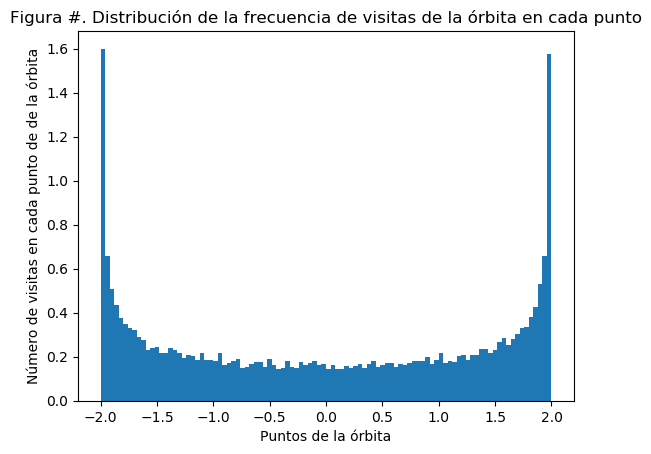

PyObject Text(0.5,1,'Figura #. Distribución de la frecuencia de visitas de la órbita en cada punto')

In [172]:
h_norm_1 = PyPlot.plt[:hist](iterados_aleatorios_1, normed=true, bins=100);
#grid("on")
xlabel("Puntos de la órbita")
ylabel("Número de visitas en cada punto de de la órbita")
title("Figura #. Distribución de la frecuencia de visitas de la órbita en cada punto")

La información y documentación requerida para gráficar histogramas fue obtenida del sitio web http://nbviewer.jupyter.org/github/gizmaa/Julia_Examples/blob/master/pyplot_histogram.ipynb (una extensión del notebook https://gist.github.com/gizmaa/7214002).

Algunas conclusiones obtenidas a partir del análisis del mapeo de $F(x) = x^2-2$ en el intervalo $[-2,2]$ son:

[1] El histograma muestra la frecuencia de visitas (u ocurrencia) de cada uno de los puntos de la órbita generada por el mapeo de $F(x) = x^2-2$. Esto significa que aquellos puntos con una mayor frecuencia de visitas (o una mayor ocurrencia), como es el caso de los puntos $x0 = 2, -2$ en el presente histograma, "fueron obtenidos una mayor cantidad de veces" por el mapeo $F(x) = x^2-2$. Por lo tanto, se concluye que los puntos de la órbita $x0 = 2, -2$ son puntos del mapeo $F(x) = x^2-2$

[2] Debido a que el primer punto usado como condición inicial fue tomado al azar en el intervalo $[-2,2]$, la distribucion obtenida en el histograma representa la tendencia "que sigue" la órbita del mapeo independientemente de la condición inicial a partir de la cual se comenzó a iterar. 

[3] Del mismo modo, se observa que a partir de cierto número `n` de iterados,  la distribución del histograma (es decir, la frecuencia de visitas para cada uno de los puntos de la órbita) será en escencia la misma para cualquier número de iterados mayor o igual a `n` que se elija.

### (a) Mapeo $G(x) = 2x \mod 1$ en el intervalo [0,1]

Para analizar el mapeo de Definiendo la función $G(x) = 2x\mod1$

In [241]:
G(x) = mod(2x, 1)

G (generic function with 1 method)

In [239]:
iterados_aleatorios_2 = Fμ(G, rand(), 500)

501-element Array{Float64,1}:
 0.888319
 0.776638
 0.553277
 0.106554
 0.213108
 0.426216
 0.852431
 0.704862
 0.409724
 0.819449
 0.638897
 0.277795
 0.555589
 ⋮       
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     

In [229]:
#h_2= histogram(iterados_aleatorios_2, nbins=length(iterados_aleatorios_2))
#Plots.savefig(h_2, "histograma2_1.png")

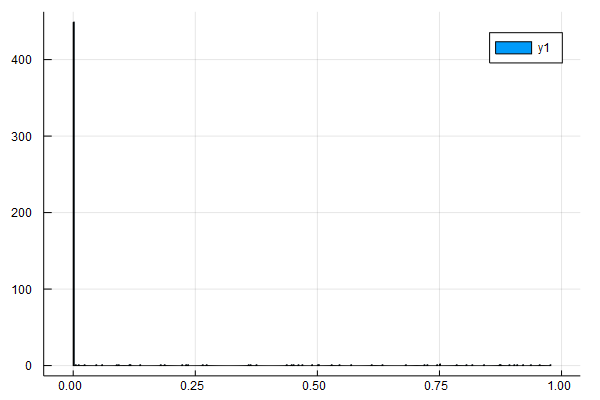

Se muestra el histograma del mapeo de $G(x) = 2x \mod1$ cuyos numero de iterados es 500. 

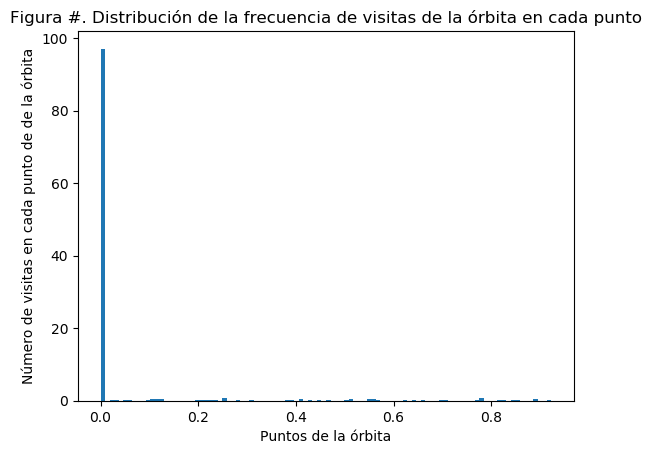

PyObject Text(0.5,1,'Figura #. Distribución de la frecuencia de visitas de la órbita en cada punto')

In [240]:
h_norm_2 = PyPlot.plt[:hist](iterados_aleatorios_2, normed=true, bins=100);
xlabel("Puntos de la órbita")
ylabel("Número de visitas en cada punto de de la órbita")
title("Figura #. Distribución de la frecuencia de visitas de la órbita en cada punto")

La información y documentación requerida para gráficar histogramas fue obtenida del sitio web http://nbviewer.jupyter.org/github/gizmaa/Julia_Examples/blob/master/pyplot_histogram.ipynb (extensión del notebook https://gist.github.com/gizmaa/7214002).

## 6

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$. ¿Qué podemos decir de la convergencia?

## 7

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.) ¿Qué podemos decir de la convergencia?

## 8

En el ejercicio 3, implementaron el análisis gráfico (y el método de Newton) para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Usen el módulo de duales para mostrar la estabilidad de esos puntos.